In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import random
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
data = pd.read_csv("spam.csv", encoding = "latin-1")
data = data[['v1', 'v2']]
data = data.rename(columns = {'v1': 'label', 'v2': 'text'})

lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

In [3]:
def review_messages(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

In [4]:
# Processing text messages
data['text'] = data['text'].apply(review_messages)

########$
## X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.1, random_state = 1)
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
dataX = vectorizer1.fit_transform(data['text'])
dataY = vectorizer2.fit_transform(data['label'])
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY[:,0], test_size = 0.1, random_state = 1)

X_train = np.matrix(X_train.toarray())
X_test = np.matrix(X_test.toarray())
y_train = np.matrix(y_train.toarray())
y_test = np.matrix(y_test.toarray())

In [5]:
def Output(x):
#     Yn = np.where(x<.5,0,x)
#     Yn = np.where(Yn>=.5,1,Yn)
    Yn = x
    return Yn

In [6]:
def Structt(Lh, Input_data):
    Bias = np.matrix([1 for i in range(np.size(Input_data[:,0]))])
    XX = np.vstack((Bias, Input_data.T)).T
    W = []
    for i in range(np.size(Lh)):
        if i == 0:
            W.append(np.matrix(np.random.normal(0, 1, Lh[i] * (XX[0].size))).reshape(Lh[i], XX[0].size))
        else:
            W.append(np.matrix(np.random.normal(0, 1, Lh[i] * (Lh[i-1] + 1 ))).reshape(Lh[i], Lh[i-1] + 1))
    return W

In [7]:
def parameters(Krum,Avg):
    temps = np.zeros((100000,1))
    Avg = Avg
    Krum = Krum
    
    MB = 3
    
    #initializition:
#     η1 = .05
#     η2 = .005  
#     η3 = .005
    
    η1 = .005
    η2 = .0005  
    η3 = .0005
    return MB, Krum, Avg, η1, η2, η3, temps

In [8]:
def Activation(x):
    return 1 / (1 + np.exp(-x))

def Activation_dev(x):
    return np.exp(-x)/np.power((1+np.exp(-x)),2)

In [9]:
def FP(W, Input_data):
    V = []  
    Y = []
    W = W
    Bias = np.matrix([1 for i in range(np.size(Input_data[:,0]))])
    XX = np.vstack((Bias, Input_data.T)).T
    for i in range(np.size(W)):
        if i == 0:
            V.append(np.matmul(W[i], XX.T))
        else:
            V.append(np.matmul(W[i], Y[i-1]))
        if i < np.size(W) - 1:
            Temp = Activation(V[i])
            Bias = np.matrix([1 for j in range(np.size(Temp[0,:]))])
            Y.append(np.vstack((Bias, Temp)))
        else:
            Y.append(Activation(V[i]))
        
    return V, Y

In [10]:
def BP(W, V, Y, Actual_output, Input_data):
    G = []
    W = WW
    j = np.size(W) - 1
    Bias = np.matrix([1 for i in range(np.size(Input_data[:,0]))])
    XX = np.vstack((Bias, Input_data.T)).T
    
    for i in range(np.size(W)):
        if i == 0:
            DEL = np.multiply(np.subtract(Actual_output, Y[j].T), Activation_dev(V[j]).T)
            G.append(np.matmul(Y[j-1], DEL))
        else:
            if i < np.size(W) - 1:
                DEL = np.multiply(np.matmul(DEL, np.delete(W[j],0,1)).T, Activation_dev(V[j-1]))
                G.append(np.matmul(Y[j-2], DEL.T))
                j -= 1
                DEL = DEL.T
            else:
                DEL = np.multiply(np.matmul(DEL, np.delete(W[j],0,1)).T, Activation_dev(V[j-1]))
#                 DEL = np.multiply(np.matmul(DEL, np.delete(W[j],0,1)).T, 1)
                G.append(np.matmul(XX.T, DEL.T))
    G.reverse()
    return G

In [11]:
def Error(Y33, y_train):
    F = np.count_nonzero(Y33 - y_train.T)
    return F

In [12]:
# n-f-2, considered as "Consider"
def Check_KRUM(WXXttc,Consider,m):
    m = m
    F = Consider
    WXXttc = WXXttc
#     k = Avg
    
    Vi_Vj = np.zeros((k,1))
    Score = np.zeros((k,1))
    ress = []
    for i in range(k): 
        for j in range(k):
            Vi_Vj[j]  = np.linalg.norm(WXXttc[i] - WXXttc[j])**2
        # Since Vi-Vi = 0, we consider k+1 minimum(k>0 minimum)
        if F < k:
            res = sorted(range(len(Vi_Vj)), key = lambda sub: Vi_Vj[sub])[:F-2] 
        elif F == k:
            res = sorted(range(len(Vi_Vj)), key = lambda sub: Vi_Vj[sub])[:F-2] 
        Score[i] = np.sum(Vi_Vj[res])
        ress.append(Score[i])
    Min_Score = sorted(range(len(Score)), key = lambda sub: Score[sub])[:F] 
    Temp = 0
    for i in range(m):
        Temp = Temp + WXXttc[Min_Score[i]]
    return Temp, Min_Score[:m], ress 

In [13]:
# def log_liklihood(B, y_train):
#     T = 0
#     for i in range(np.size(y_train)):
#         T = -(y_train[i] * np.log(B[0,i]) + (1-y_train[i]) * np.log(1-B[0,i])) + T
#     return T/np.size(y_train)        

In [14]:
def log_liklihood(B,y):
    Tempy = np.ones(np.size(y[:,0]) * np.size(y[0,:])).reshape(np.size(y[:,0]), np.size(y[0,:]))
    y_prime = Tempy - y
    TempB = np.ones(np.size(B[:,0]) * np.size(B[0,:])).reshape(np.size(B[:,0]), np.size(B[0,:]))
    B_prime = (TempB - B).T
    T = -1 * np.sum(np.multiply(y, np.log(B).T) + np.multiply(y_prime, np.log(B_prime)))
    return T/np.size(y[:,0])

In [25]:
Wfds = Structt([10,10,1], X_train)

In [26]:
mu = 0
sigma = 200

a,b = WW[2].shape
c,d = WW[1].shape
e,f = WW[0].shape

G2_B = np.random.normal(mu, sigma, a*b).reshape(b,a)
G1_B = np.random.normal(mu, sigma, c*d).reshape(d,c)
G0_B = np.random.normal(mu, sigma, e*f).reshape(f,e)

In [147]:
def parameters(Krum):
    
    temps = np.zeros((100000,1))
    Krum = Krum
    
    #Not bad
    η1 = .0001
    η2 = .0001  
    η3 = .0001
    MB = 3
    Avg = 50
    
    return MB, Avg, η1, η2, η3, temps

In [148]:
Data = []
def Split(X,Y,n):
    m_w = np.size(y_train[:,0]) // n
    O = []
    I = []
    for i in range(n):
        I.append(X[i*m_w:i*m_w+m_w,:])
        O.append(Y[i*m_w:i*m_w+m_w])
    return I, O

In [164]:
def t(Kfast, Avg):
#     T = np.random.exponential(scale=100, size=(Avg, 1))
    T = np.random.rand(Avg,1) * Kfast
    Time_Index  = sorted(range(len(T)), key = lambda kk: T[kk])
    T = np.sort(T,axis=0)
    Temp = Time_Index[0:Kfast]
    return T[Time_Index[Kfast]], Temp


In [150]:
I, O = Split(X_train, y_train, Avg)

In [151]:
WW = list(Wfds)

In [152]:
MB, Avg, η1, η2, η3, err_Itr_Krum40 = parameters(1)
Kfast = 40
jing = 10
MaxItr = 200
Learn = .9
darsad = 1

In [153]:
j = 0
Temp = 1
STOP = 0
Misclass = []
Itr = 0

Itr_d = 0

test = []
TTime40 = 0
Time40 = []

while STOP < 1:
    while Itr <= MaxItr:

        GRAD3a = 0
        GRAD2a = 0
        GRAD1a = 0
#         print("Where are we?!", Itr)

        if Itr % darsad == 0:
            η1 = η1 * Learn
            η2 = η2 * Learn
            η3 = η3 * Learn
        
        Grad0_Krum = []
        Grad1_Krum = []
        Grad2_Krum = []     
                
        #Kfast
        T, Temp = t(Kfast, Avg)
        TTime40 = T + TTime40
        Time40.append(TTime40) 
        
        # In each round
        byz_set = [0,1]
#         for i in range(Avg): 
        for i in Temp:
            if i in byz_set:
                Grad2_Krum.append(G2_B)
                Grad1_Krum.append(G1_B)
                Grad0_Krum.append(G0_B)
            else:
                AA = I[i]
                BB = O[i]
                a, b = I[i].shape
                if MB*Itr_d > a:
                    Itr_d = 0

                Input_data = AA[MB*Itr_d:MB + MB*Itr_d,:]
                Actual_output = BB[MB*Itr_d:MB + MB*Itr_d]
                V, Y = FP(WW, Input_data)
                G = BP(WW, V, Y, Actual_output, Input_data)
                Grad2_Krum.append(G[2])
                Grad1_Krum.append(G[1])
                Grad0_Krum.append(G[0])

        #Krum   
        Consider = np.size(Temp) - 2
        m = np.size(Temp) - 2
        Krum = m 
        k = np.size(Temp)
        GRAD2a, a, b = Check_KRUM(Grad2_Krum, Consider, m)
        GRAD1a, a, b = Check_KRUM(Grad1_Krum, Consider, m)
        GRAD0a, a, b = Check_KRUM(Grad0_Krum, Consider, m)
        
        
        #Error
        A,B = FP(WW, X_test)
        B = Output(B[np.size(WW) - 1])
#         err_Itr1[(Itr)] = Error(B, y_train)/np.size(y_train)
        err_Itr_Krum40[(Itr)] = log_liklihood(B, y_test)
#         print(err_Itr_Krum40[(Itr)])
        
        G2 = GRAD2a.T/Krum
        G1 = GRAD1a.T/Krum
        G0 = GRAD0a.T/Krum
        
        G2 = GRAD2a.T
        G1 = GRAD1a.T
        G0 = GRAD0a.T

        WW[2] = WW[2] + η3 * G2
        WW[1] = WW[1] + η2 * G1
        WW[0] = WW[0] + η1 * G0
  
        Itr_d += 1
        Itr += 1
        
    STOP += 1

In [154]:
F40 = np.floor(Time40)
Err40 = err_Itr_Krum40
k = 0
E40 = []
for i in range(np.size(F40) - 1):
    if i==0:
        E40.append(Err40[k])
        for j in range(1,int(F40[i])):
            E40.append(Err40[k])
    else:
        for j in range(int(F40[i]), int(F40[i+1])):
            E40.append(Err40[k])
    k += 1

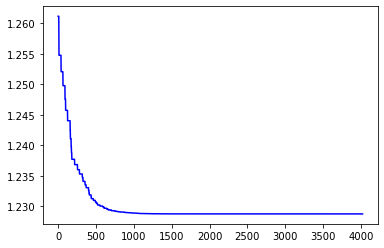

In [155]:
plt.plot(E40,'b')

In [156]:
WW = list(Wfds)

In [157]:
MB,Avg, η1, η2, η3, err_Itr_Krum10 = parameters(1)
Kfast = 20

In [158]:
j = 0
Temp = 1
STOP = 0
Misclass = []
Itr = 0

Itr_d = 0

test = []
TTime10 = 0
Time10 = []

while STOP < 1:
    while Itr <= MaxItr:
        
        GRAD3a = 0
        GRAD2a = 0
        GRAD1a = 0
#         print("Where are we?!", Itr)
        if Itr % darsad == 0:
            η1 = η1 * Learn
            η2 = η2 * Learn
            η3 = η3 * Learn
        
        Grad0_Krum = []
        Grad1_Krum = []
        Grad2_Krum = []     

        
        #Kfast
        T, Temp = t(Kfast, Avg)
        TTime10 = T + TTime10
        Time10.append(TTime10) 
#         print(Time10)
        
        # In each round
        byz_set = [0,1]
#         for i in range(Avg): 
        for i in Temp:
            if i in byz_set:
                Grad2_Krum.append(G2_B)
                Grad1_Krum.append(G1_B)
                Grad0_Krum.append(G0_B)
            else:
                AA = I[i]
                BB = O[i]
                a, b = I[i].shape
                if MB*Itr_d > a:
                    Itr_d = 0                
                Input_data = AA[MB*Itr_d:MB + MB*Itr_d,:]
                Actual_output = BB[MB*Itr_d:MB + MB*Itr_d]
                V, Y = FP(WW, Input_data)
                G = BP(WW, V, Y, Actual_output, Input_data)
                Grad2_Krum.append(G[2])
                Grad1_Krum.append(G[1])
                Grad0_Krum.append(G[0])

        #Krum   
        Consider = np.size(Temp) - 2
        m = np.size(Temp) - 2
        Krum = m 
        k = np.size(Temp)
        GRAD2a, a, b = Check_KRUM(Grad2_Krum, Consider, m)
        GRAD1a, a, b = Check_KRUM(Grad1_Krum, Consider, m)
        GRAD0a, a, b = Check_KRUM(Grad0_Krum, Consider, m)
        
        
        #Error
        A,B = FP(WW, X_test)
        B = Output(B[np.size(WW) - 1])
#         err_Itr1[(Itr)] = Error(B, y_train)/np.size(y_train)
        err_Itr_Krum10[(Itr)] = log_liklihood(B, y_test)
#         print(err_Itr_Krum10[(Itr)])
        
        G2 = GRAD2a.T/Krum
        G1 = GRAD1a.T/Krum
        G0 = GRAD0a.T/Krum
        
        G2 = GRAD2a.T
        G1 = GRAD1a.T
        G0 = GRAD0a.T

        WW[2] = WW[2] + η3 * G2
        WW[1] = WW[1] + η2 * G1
        WW[0] = WW[0] + η1 * G0
  
        Itr_d += 1
        Itr += 1
        
    STOP += 1

In [159]:
F10 = np.floor(Time10)
Err10 = err_Itr_Krum10
k = 0
E10 = []
for i in range(np.size(F10) - 1):
    if i==0:
        E10.append(Err10[k])
        for j in range(1,int(F10[i])):
            E10.append(Err10[k])
    else:
        for j in range(int(F10[i]), int(F10[i+1])):
            E10.append(Err10[k])

    k += 1

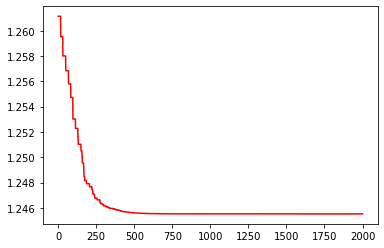

In [160]:
plt.plot(E10,'r')

In [161]:
print(np.max(Time10), np.max(Time40))

2019.4299739683 4048.15958892463


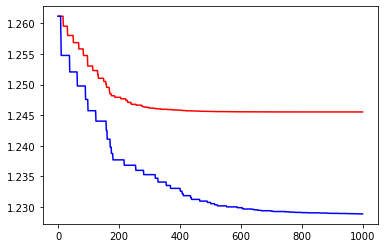

In [162]:
plt.plot(E10[0:1000],'r')
plt.plot(E40[0:1000],'b')

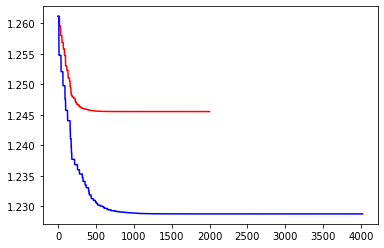

In [163]:
plt.plot(E10,'r')
plt.plot(E40,'b')

In [ ]:
plt.plot(Err10[80:np.count_nonzero(Err40)],'r')
plt.plot(Err40[80:np.count_nonzero(Err40)],'b')

In [ ]:
WW = list(Wfds)

In [ ]:
MB, Krum, Avg, η1, η2, η3, err_Itr_Krum20 = parameters(1,50)
Kfast = 20

In [ ]:



j = 0
Temp = 1
STOP = 0
Misclass = []
Itr = 0

Itr_d = 0

test = []
TTime20 = 0
Time20 = []

while STOP < 1:
    while Itr <= MaxItr*2:
        
        GRAD3a = 0
        GRAD2a = 0
        GRAD1a = 0
#         print("Where are we?!", Itr)
        if Itr % darsad == 0:
            η1 = η1 * Learn
            η2 = η2 * Learn
            η3 = η3 * Learn
        
        Grad0_Krum = []
        Grad1_Krum = []
        Grad2_Krum = []     
                
        if MB*Avg*Itr_d + MB*Avg > np.size(X_train[:,0]):
            Itr_d = 0
        
        #Kfast
        T = np.random.rand(Avg) * jing
        Time_Index  = sorted(range(len(T)), key = lambda kk: T[kk])
        Temp = Time_Index[0:Kfast]
        TTime20 = T[Time_Index[Kfast]] + TTime10
        Time20.append(TTime20)
#         print(Time10)
        
        # In each round
        byz_set = [0,1]
#         for i in range(Avg): 
        for i in Temp:
            if i in byz_set:
                Grad2_Krum.append(G2_B)
                Grad1_Krum.append(G1_B)
                Grad0_Krum.append(G0_B)
            else:
                Input_data = X_train[i*MB + MB*Avg*Itr_d:i*MB + MB + MB*Avg*Itr_d,:]
                Actual_output = y_train[i*MB + MB*Avg*Itr_d:i*MB + MB + MB*Avg*Itr_d]
                V, Y = FP(WW, Input_data)
                G = BP(WW, V, Y, Actual_output, Input_data)
                Grad2_Krum.append(G[2])
                Grad1_Krum.append(G[1])
                Grad0_Krum.append(G[0])

        #Krum   
        Consider = np.size(Temp) - 2
        m = np.size(Temp)//2
        Krum = m 
        k = np.size(Temp)
        GRAD2a, a, b = Check_KRUM(Grad2_Krum, Consider, m)
        GRAD1a, a, b = Check_KRUM(Grad1_Krum, Consider, m)
        GRAD0a, a, b = Check_KRUM(Grad0_Krum, Consider, m)
        
        
        #Error
        A,B = FP(WW, X_test)
        B = Output(B[np.size(WW) - 1])
#         err_Itr1[(Itr)] = Error(B, y_train)/np.size(y_train)
        err_Itr_Krum20[(Itr)] = log_liklihood(B, y_test)
#         print(err_Itr_Krum10[(Itr)])
        
        G2 = GRAD2a.T/Krum
        G1 = GRAD1a.T/Krum
        G0 = GRAD0a.T/Krum
        
        G2 = GRAD2a.T
        G1 = GRAD1a.T
        G0 = GRAD0a.T

        WW[2] = WW[2] + η3 * G2
        WW[1] = WW[1] + η2 * G1
        WW[0] = WW[0] + η1 * G0
  
        Itr_d += 1
        Itr += 1
        
    STOP += 1

In [ ]:
F20 = np.floor(Time20)
Err20 = err_Itr_Krum20
k = 0
E20 = []
for i in range(np.size(F20) - 1):
    if i==0:
        E10.append(Err20[k])
        for j in range(1,int(F20[i])):
            E20.append(Err20[k])
    else:
        for j in range(int(F20[i]), int(F20[i+1])):
            E20.append(Err20[k])

    k += 1

In [ ]:
plt.plot(E10[0:10000],'r')
plt.plot(E20[0:10000],'c')
plt.plot(E40[0:10000],'b')

In [ ]:
plt.plot(Err10[80:np.count_nonzero(Err40)],'r')
plt.plot(Err20[80:np.count_nonzero(Err40)],'c')
plt.plot(Err40[80:np.count_nonzero(Err40)],'b')